In [1]:
from Bernstein import berstein
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [2]:
from math import sqrt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

matplotlib.rcParams['text.usetex'] = True

# Bernstein polynomial

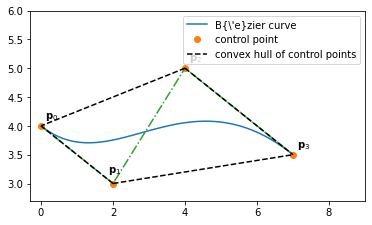

In [5]:

# def berstein(n, i, t, T):
control_points_t = np.array([(0,4), (2,3), (4,5), (7,3.5)])
control_points = [np.array(p) for p in control_points_t]

N = len(control_points) 

def B(t):
    return sum([berstein(N - 1, i, t, 1) * control_points[i] for i in range(0, N)])


hull = ConvexHull(control_points)
points = list(zip(*[tuple(B(t)) for t in np.linspace(0,1, 100)]))

fig, ax = plt.subplots(figsize=(6, 3.5))


#plt.rc('text', usetex=True)
plt.rc('text', usetex=False)

plt.plot(points[0], points[1], label = r"B{\'e}zier curve")


plt.plot(control_points_t[:,0], control_points_t[:,1], 'o', label="control point")
plt.plot(control_points_t[:,0], control_points_t[:,1], '-.')

flag = True
for simplex in hull.simplices:
    if flag:
        plt.plot(control_points_t[simplex, 0], control_points_t[simplex, 1], 'k--',  label='convex hull of control points')
        flag = False
    else:
        plt.plot(control_points_t[simplex, 0], control_points_t[simplex, 1], 'k--')

        
# TODO lengend placed outside the box
# TODO control points 

for i, (x, y) in enumerate(control_points_t):
    if (i == 1):
        plt.text(x-0.15, y+0.2, r'$\mathbf{p}_{%d}$'%i)


    else:
        plt.text(x+0.1, y+0.13, r'$\mathbf{p}_{%d}$'%i)

ax.set_ylim(2.7, 6)


ax.set_xlim(-0.3, 9)

ax.legend(loc ="upper right", bbox_to_anchor = (0,0,1,1))

plt.savefig("bezier.pdf")

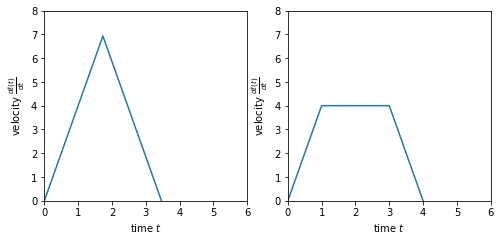

In [6]:
l_a = [(0, sqrt(3), 2 * sqrt(3)), (0, 4 * sqrt(3), 0)]
l_b = [(0, 1, 3, 4), (0, 4, 4, 0)]

xlim = [0, 6]
ylim = [0, 8]

fig, ax = plt.subplots(figsize=(8, 3.5))


ax = plt.subplot(121)
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)

plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')

plt.plot(l_a[0], l_a[1])


ax = plt.subplot(122)
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)
plt.plot(l_b[0], l_b[1])
plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')
plt.savefig("different_velocity.pdf")

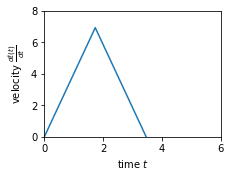

In [8]:
l_a = [(0, sqrt(3), 2 * sqrt(3)), (0, 4 * sqrt(3), 0)]

xlim = [0, 6]
ylim = [0, 8]

fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.set_ylim(*ylim)
ax.set_xlim(*xlim)

plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')
plt.plot(l_a[0], l_a[1])
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.savefig("velocity_l.pdf")

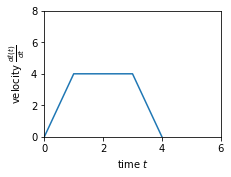

In [9]:
l_b = [(0, 1, 3, 4), (0, 4, 4, 0)]

xlim = [0, 6]
ylim = [0, 8]

fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.set_ylim(*ylim)
ax.set_xlim(*xlim)

plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')

plt.plot(l_b[0], l_b[1])
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.savefig("velocity_r.pdf")